Performing EDA on the given datasets using heatmaps to determine the most relevant features(numeric)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


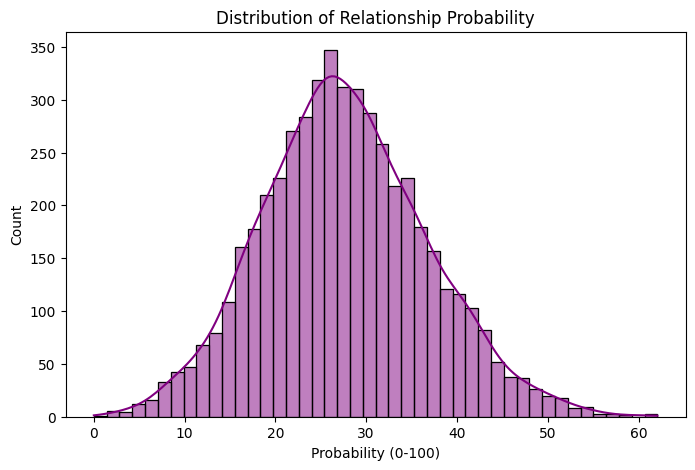

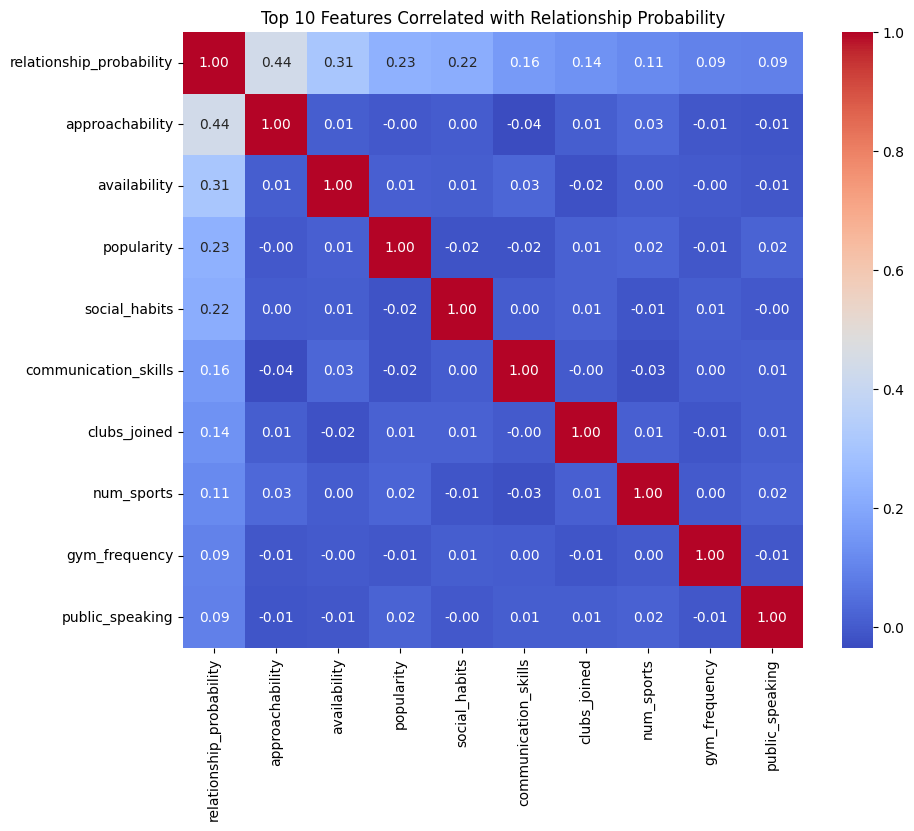

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 5))
sns.histplot(train['relationship_probability'], kde=True, color='purple')
plt.title('Distribution of Relationship Probability')
plt.xlabel('Probability (0-100)')
plt.show()


corr = train.corr(numeric_only=True)

top_cols = corr.nlargest(10, 'relationship_probability')['relationship_probability'].index

plt.figure(figsize=(10, 8))
sns.heatmap(train[top_cols].corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top 10 Features Correlated with Relationship Probability')
plt.show()

Using a linear regression model to predict relationship, as linear regression is not confined to probability limits clipping it from 0 to 100. Finding out RSME to predict model's accuracy.

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



train = pd.read_csv("/kaggle/input/gdgc-ai-ml-inductions-batch-2025-26/train.csv")
test = pd.read_csv("/kaggle/input/gdgc-ai-ml-inductions-batch-2025-26/test.csv")
feature = pd.read_csv("/kaggle/input/gdgc-ai-ml-inductions-batch-2025-26/feature_lookup.csv")

rename = dict(zip(feature["feature_code"], feature["relevance"]))
train = train.rename(columns = rename)
test = test.rename(columns = rename)

target = 'relationship_probability'

y = train[target]
X = train.drop(columns=[target, 'ID'])
X_test = test.drop(columns=['ID'])

all_data = pd.concat([X,X_test])
all_data = pd.get_dummies(all_data)

all_data = all_data.fillna(0)

X = all_data.iloc[:len(train)]
X_test = all_data.iloc[len(train):]

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X,y,test_size = 0.2, random_state=42)

model = LinearRegression()

model.fit(X_train_split, y_train_split)

valid = model.predict(X_val_split)
valid = valid.clip(0,100)
rmse = mean_squared_error(y_val_split, valid, squared = False)
print(f"Validation Score: {rmse}")

model.fit(X,y)
prediction = model.predict(X_test)
prediction = prediction.clip(0,100)

submission = pd.DataFrame({
    'ID': test['ID'],
    'relationship_probability' : prediction
})

submission.to_csv("submission.csv", index=False)
print("Submission file saved successfully!")

import joblib
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

model.fit(X_scaled, y)

model_package = {
    'model': model,
    'scaler': scaler,
    'model_columns': X.columns.tolist()
}


joblib.dump(model_package, 'relationship_model.pkl')

print("✅ SUCCESS! 'relationship_model.pkl' has been saved.")


Validation Score: 4.628578125293165
Submission file saved successfully!
✅ SUCCESS! 'relationship_model.pkl' has been saved.
Go to the 'Output' section (Right Sidebar) to download it.
